In [1]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
from src import image_selection
from src.Tile import Tile

# Filtering by symmetry

In this notebook I check that images are symmetric (vertically, horizontally, or diagonally). I also try to cut image into n^2 number of pieces, where n in [4, 9, 16, 25, 36, 49, 64] to find images consisting of multiple tiles.

In [3]:
folder_list = [
    'dataset/google/azulejo',
    'dataset/google/portuguese tiles',
    'dataset/bing/azulejo',
    'dataset/bing/hand painted tile',
    'dataset/bing/handmade tile',
    'dataset/bing/portuguese tile'
]

In [6]:
cut_off_dict = {
    'dataset/google/azulejo': {'mse':0.1, 'ssim': 0.9},
    'dataset/google/portuguese tiles': {'mse':0.15, 'ssim': 0.85},
    'dataset/bing/azulejo': {'mse':0.25, 'ssim': 0.75},
    'dataset/bing/hand painted tile': {'mse':0.3, 'ssim': 0.5},
    'dataset/bing/handmade tile': {'mse':0.15, 'ssim': 0.85},
    'dataset/bing/portuguese tile': {'mse':0.15, 'ssim': 0.85},
}

Working on dataset/google/azulejo folder.


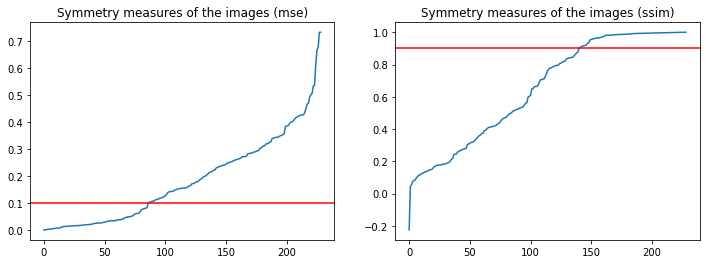

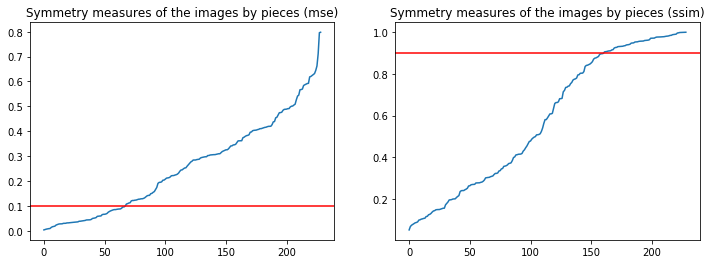

Random sample of not symmetric images - they didn't make it.


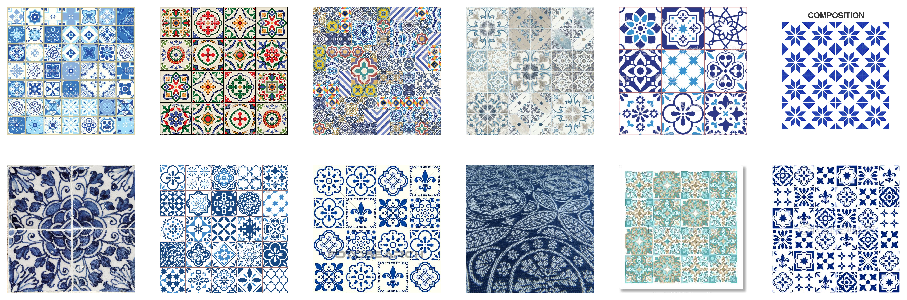

Random sample of symmetric (enough) images - they made it!


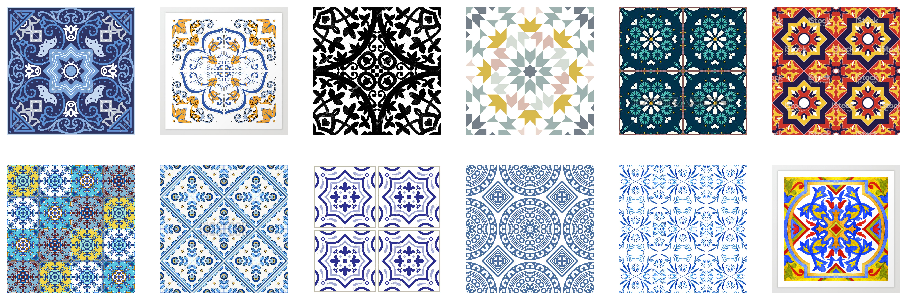

Random sample of multitile images - they made it!


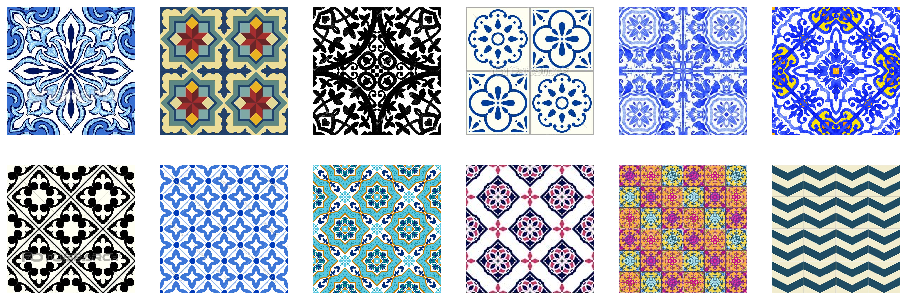

Total files: 229, out of them of suitable: 97.



Working on dataset/google/portuguese tiles folder.


In [ ]:
plot_sample = 12

for folder in folder_list:
    print('Working on {} folder.'.format(folder))
    files = [_.strip() for _ in open('lists/contrasting_{}.txt'.format(folder.replace('/', '-')), 'r').readlines()]
    
    sample_symmetric, sample_multitile = image_selection.get_symmetric_imgs(files, folder, cut_offs=cut_off_dict[folder])
    sample_other = [img_file for img_file in files if img_file not in sample_symmetric + sample_multitile]
    
    print('Random sample of not symmetric images - they didn\'t make it.')
    
    Tile.plot_grid(
        [
            Tile(cv2.imread('{}/{}'.format(folder, img_file))[...,::-1]) 
            for img_file in
            np.random.choice(sample_other, min(plot_sample, len(sample_other)), replace=False)
        ],
        cols=6
    )
    if len(sample_symmetric) > 2:
        print('Random sample of symmetric (enough) images - they made it!')
        Tile.plot_grid(
            [
                Tile(cv2.imread('{}/{}'.format(folder, img_file))[...,::-1]) 
                for img_file in
                np.random.choice(sample_symmetric, min(plot_sample, len(sample_symmetric)), replace=False)
            ],
            cols=6
        )
    else:
        print('Not enough symmetric images to display')

    if len(sample_multitile) > 2:
        print('Random sample of multitile images - they made it!')
        Tile.plot_grid(
            [
                Tile(cv2.imread('{}/{}'.format(folder, img_file))[...,::-1]) 
                for img_file in
                np.random.choice(sample_multitile, min(plot_sample, len(sample_multitile)), replace=False)
            ],
            cols=6
        )
    else:
        print('Not enough multitile images to display')
    
    print(
        'Total files: {}, out of them of suitable: {}.'.format(
            len(files), 
            len(set(sample_symmetric).union(set(sample_multitile)))
        )
    )
    
    with open('lists/symmetic_{}.txt'.format(folder.replace('/', '-')), 'w') as filehandle:
        for filename in sample_symmetric:
            filehandle.write('%s\n' % filename)
          
    with open('lists/multitile_{}.txt'.format(folder.replace('/', '-')), 'w') as filehandle:
        for filename in sample_multitile:
            filehandle.write('%s\n' % filename)
          
    print('\n\n')